# Malware Image Classification Using Machine Learning

In [1]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

In [2]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
data = np.load('malimg.npz')
np.load = np_load_old

In [3]:
data.files

['arr']

In [4]:
data['arr'].shape
dataset = data

In [5]:
features = dataset['arr'][:, 0]
features = np.array([feature for feature in features])
features = np.reshape(features, (features.shape[0], features.shape[1] * features.shape[2]))
features = StandardScaler().fit_transform(features)
labels = dataset['arr'][:, 1]
labels = np.array([label for label in labels])

In [6]:
X = features
y = labels

In [7]:
type(X)

numpy.ndarray

In [10]:
import pandas as pd
df = pd.DataFrame(X,index=X[:,0])

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
-0.649274,-0.649274,-0.717769,-0.758433,-0.763574,-0.815396,-0.636464,-0.766611,-0.783499,-0.67737,-0.75671,...,-1.146822,-0.148775,-1.44922,1.514665,-1.017164,1.275712,-0.725041,1.220045,-0.942626,1.544185
-0.649274,-0.649274,-0.717769,-0.758433,-0.763574,-0.815396,-0.636464,-0.766611,-0.783499,-0.67737,-0.75671,...,-1.171733,-0.161476,0.05348,-0.780647,0.346752,0.221605,-0.280982,0.408282,1.092737,-0.844101
-0.649274,-0.649274,-0.717769,-0.758433,-0.763574,-0.815396,-0.636464,-0.766611,-0.783499,-0.67737,-0.75671,...,-1.146822,-0.148775,-1.44922,1.514665,-1.017164,1.275712,-0.725041,1.220045,-0.942626,1.544185
-0.649274,-0.649274,-0.717769,-0.758433,-0.763574,-0.815396,-0.636464,-0.766611,-0.783499,-0.67737,-0.75671,...,-1.146822,-0.148775,-1.44922,1.514665,-1.017164,1.275712,-0.725041,1.220045,-0.942626,1.544185
-0.649274,-0.649274,-0.717769,-0.758433,-0.763574,-0.815396,-0.636464,-0.766611,-0.783499,-0.67737,-0.75671,...,-1.171733,-0.161476,0.05348,-0.780647,0.346752,0.221605,-0.280982,0.408282,1.092737,-0.844101


In [7]:
labels

array([ 0,  0,  0, ..., 24, 24, 24])

In [9]:
X_train.shape

(6257, 1024)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
#clf = svm.SVC()
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.6197274497079819

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.8504218040233614

In [34]:
clf = svm.SVC()
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.8406878650227125

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
def load_data(dataset):
    np_load_old = np.load

    # modify the default parameters of np.load
    np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
    data     = np.load(dataset)
    features = data['arr'][:,0]
    features = np.array([feature for feature in features])
    features = np.reshape(features, (features.shape[0] ,features.shape[1]* features.shape[2]))
    features = StandardScaler().fit_transform(features)
    labels   = data['arr'][:,1]
    labels   = np.array([label for label in labels])
    np.load = np_load_old
    return features,labels

In [ ]:
def one_hot(labels):
    """
        :param labels:
        :return:
    
    """
    one_hot  = np.zeros((labels.shape[0],labels.max()+1))
    one_hot[np.arange(labels.shape[0]),labels] =1
    labels = one_hot
    #labels[labels == 0] =-1
    return labels


In [ ]:
dataset = 'malimg.npz'

features,labels = load_data(dataset)
print(labels)
#labels = one_hot(labels)
X = features
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose =1, random_state =21)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.8526930564568462

In [38]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

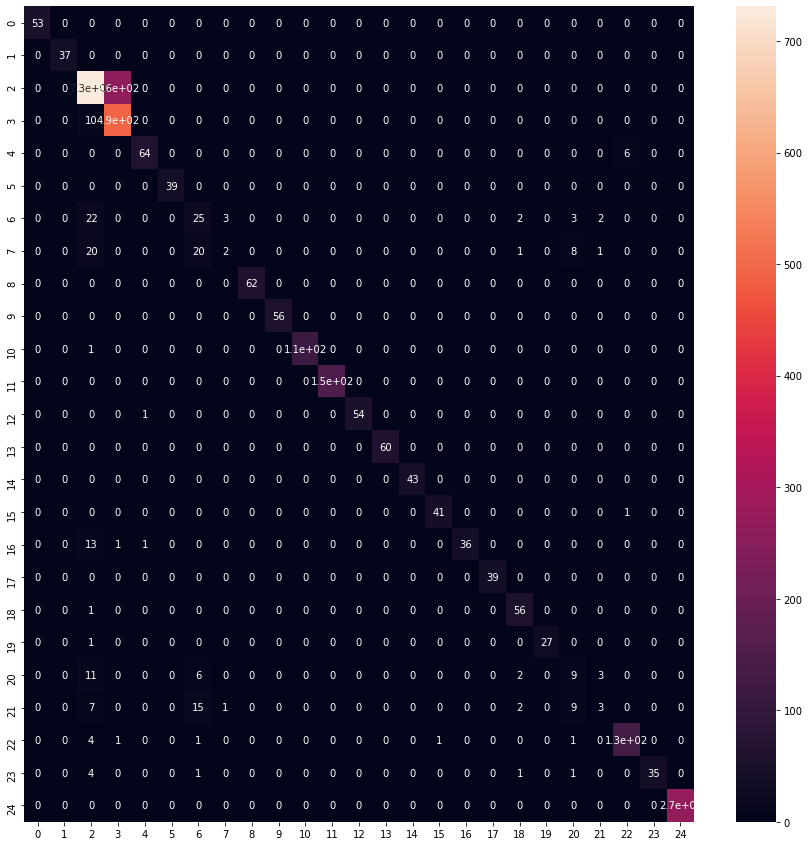

In [39]:
matrix = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(matrix)
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True)

In [40]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=1e-3,hidden_layer_sizes=(50, 50, 50,50,50), random_state=1)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.81829980532122

In [12]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.8439325113562621

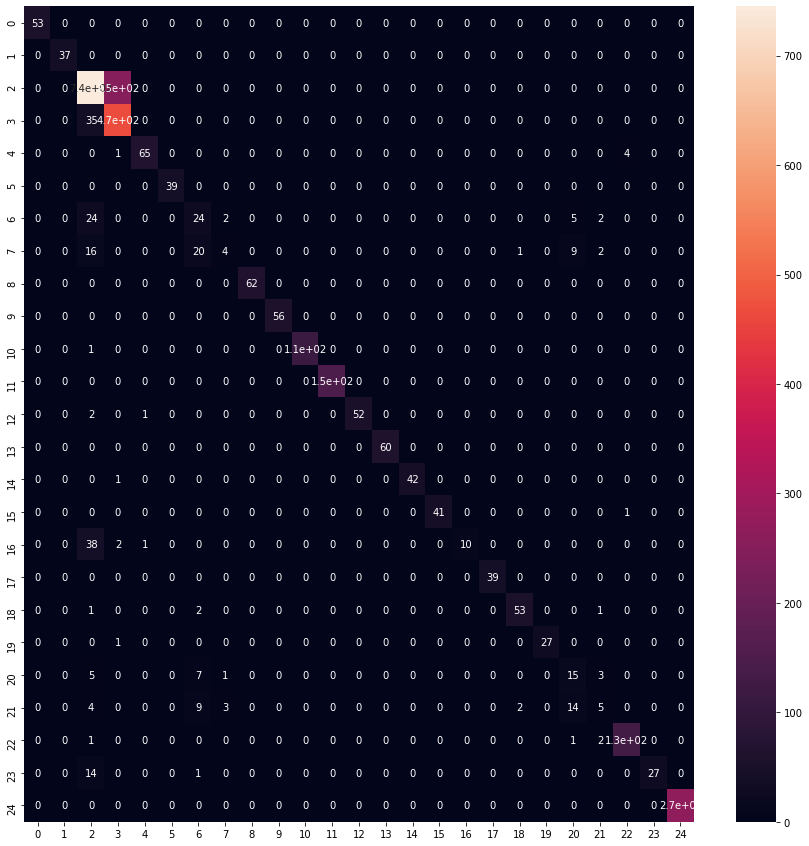

In [44]:
matrix = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(matrix)
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True)

In [45]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.3345230369889682

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(learning_rate=0.1, verbose =1, random_state =21)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

In [50]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.8105126541207008

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200,verbose=1,random_state=20)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.8559377027903958

In [19]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Automatically created module for IPython interactive environment


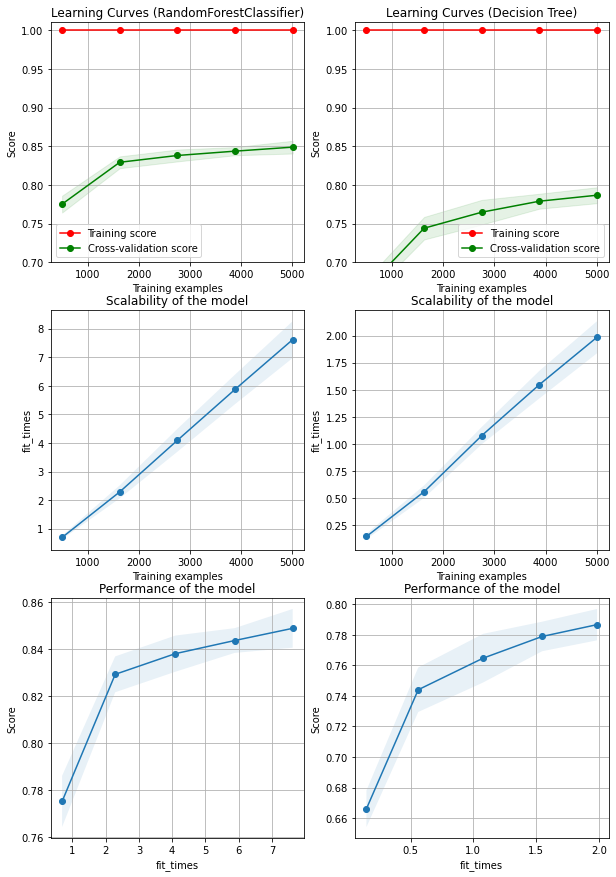

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Decision Tree)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = tree.DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [56]:
def plot_curve():
    # instantiate
    lg = MLPClassifier(alpha=1e-3,hidden_layer_sizes=(50, 50, 50,50,50), random_state=1)

    # fit
    lg.fit(X_train, y_train)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("MLP classifier")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


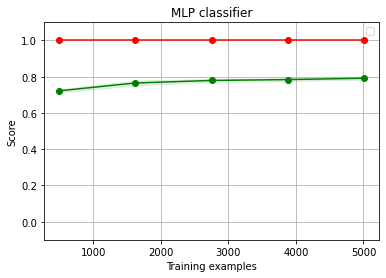

In [57]:
%matplotlib inline
plot_curve()

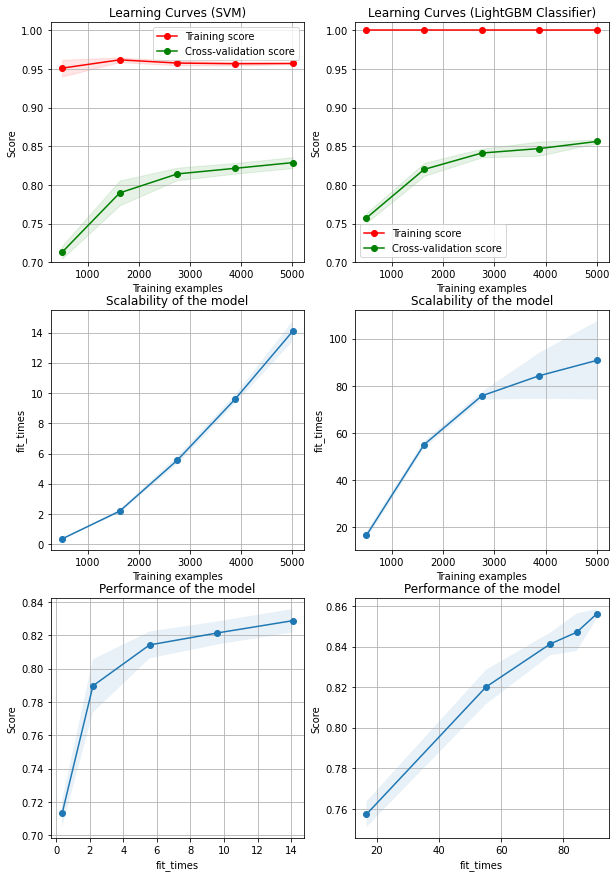

In [60]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (SVM)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

estimator = svm.SVC()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (LightGBM Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
estimator = lgb.LGBMClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [11]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8731343283582089

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
forest = RandomForestClassifier(random_state = 1)
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 2, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

In [ ]:
bestF.best_params_

In [ ]:
clf = RandomForestClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=5,n_estimators=800)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

In [8]:
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

In [9]:
nbfeatures

337

In [15]:
X_new

array([[-0.64927367, -0.71776896, -0.75843253, ...,  1.22004531,
        -0.94262565,  1.54418543],
       [-0.64927367, -0.71776896, -0.75843253, ...,  0.40828188,
         1.09273654, -0.84410101],
       [-0.64927367, -0.71776896, -0.75843253, ...,  1.22004531,
        -0.94262565,  1.54418543],
       ...,
       [-0.64927367,  0.35797953,  0.72383207, ...,  0.44756075,
        -0.66326221,  1.55561263],
       [-0.64927367,  0.35797953,  0.72383207, ...,  0.44756075,
        -0.66326221,  1.55561263],
       [-0.64927367,  0.35797953,  0.72383207, ...,  0.44756075,
        -0.66326221,  1.55561263]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier(random_state = 1)
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

In [ ]:
bestF.best_params_

In [ ]:
clf = RandomForestClassifier(n_estimators=500,max_depth=25,min_samples_split=2,min_samples_leaf=1)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)

In [16]:
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

In [63]:
def plot_curve():
    # instantiate
    lg =xgb.XGBClassifier(objective="multi:softprob", random_state=42) 

    # fit
    lg.fit(X_train, y_train)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_train, y_train, n_jobs=-1, cv=2, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("XGboost classifier")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


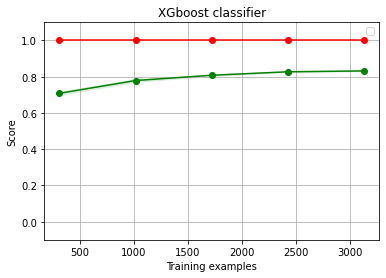

In [64]:
%matplotlib inline
plot_curve()

In [71]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.86340038935756

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 53   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  37   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0 768 227   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0]
 [  0   0  41 462   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   1  68   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0]
 [  0   0   0   0   0  39   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0  27   0   0   0  26   2   0   0   0   0   0   0   0   0   0   0
    0   0   2   0   0   0   0]
 [  0   0  17   0   0   0  20   9   0   0   0   0   0   0   0   0   0   0
    0   0   3   1   0   2   0]
 [  0   0   0   0   0   0   0   0  62   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

In [65]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=False
)
y_pred=clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6953277092796886

In [69]:
def plot_curve():
    # instantiate
    lg =CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1
    )

    # fit
    lg.fit(X_train, y_train,
        eval_set=(X_test, y_test), 
        verbose=False
          )
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_train, y_train, n_jobs=-1, cv=2, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Catboost classifier")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


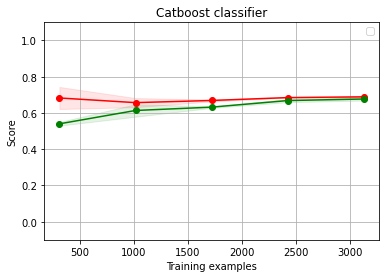

In [70]:
%matplotlib inline
plot_curve()

In [18]:
def plot_curve():
    # instantiate
    lg = MLPClassifier( alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

    # fit
    lg.fit(X_train, y_train)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_train, y_train, n_jobs=-1, cv=2, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("MLP classifier")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
No handles with labels found to put in legend.


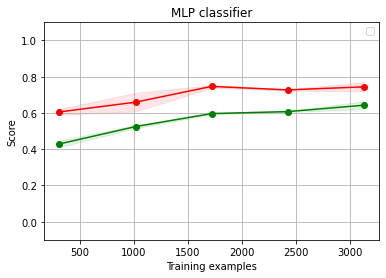

In [19]:
%matplotlib inline
plot_curve()

In [13]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import numpy as np
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
models=list()
randomforest=Pipeline([('m',RandomForestClassifier())])
models.append(('randomforest',randomforest))

svcc=Pipeline([('m',svm.SVC())])
models.append(('svcc',svcc))

xgbb=Pipeline([('m',xgb.XGBClassifier(objective="multi:softprob", random_state=42))])
models.append(('xgbb',xgbb))

lgbm=Pipeline([('m',lgb.LGBMClassifier())])
models.append(('lgbm',lgbm))

ensemble = VotingClassifier(estimators=models, voting='hard')

In [14]:
ensemble

VotingClassifier(estimators=[('randomforest',
                              Pipeline(steps=[('m',
                                               RandomForestClassifier())])),
                             ('svcc', Pipeline(steps=[('m', SVC())])),
                             ('xgbb',
                              Pipeline(steps=[('m',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                          

In [15]:
ensemble.fit(X_train, y_train) 
predicted = ensemble.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
accuracy

0.8624269954574951

NameError: name 'tree' is not defined

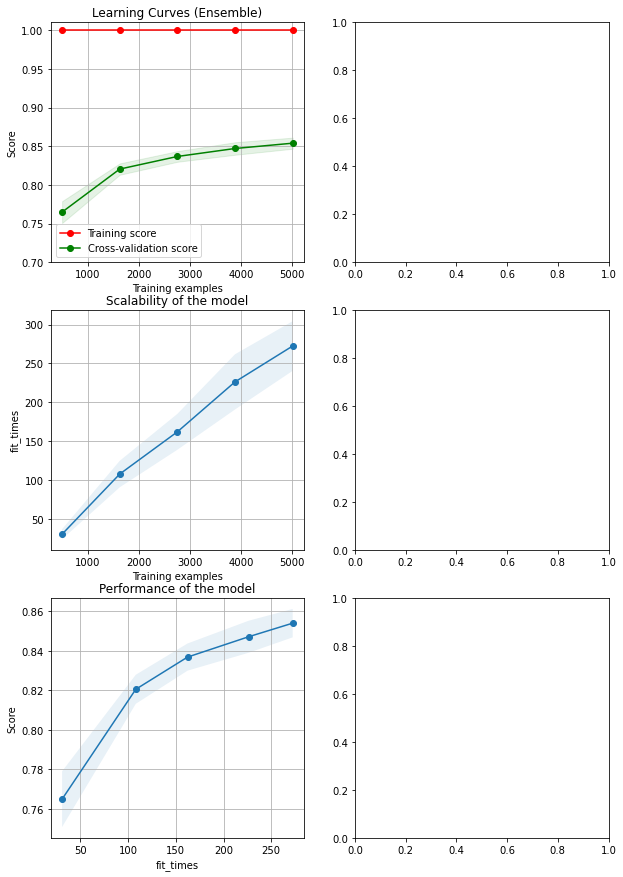

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Ensemble)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(ensemble, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Decision Tree)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = tree.DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [14]:
import joblib
filename = 'svm.sav'
joblib.dump(clf, filename)

['svm.sav']

In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'